In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import accuracy_score 
from torch import optim
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F

In [13]:
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(121), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(121))
    ax2.set_yticklabels(np.arange(121))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [62]:
train_transform = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(32),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5,0.5,0.5], 
                                                            [0.5,0.5,0.5])])

test_transform =transforms.Compose([transforms.Resize(30),
                                      transforms.CenterCrop(32),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])                                                            

data_dir = "C:/Users/asus/Documents/GitHub/strive_exer_ai_feb22/Chapter 03/21.Plankton classification/datasciencebowl"
train_data = datasets.ImageFolder(data_dir+"/train/train", transform=train_transform)  
test_data = datasets.ImageFolder(data_dir+"/test", transform=test_transform) 
                                                          

In [63]:
trainloader= torch.utils.data.DataLoader(train_data, batch_size = 32, shuffle= True)
testloader = torch.utils.data.DataLoader(test_data, batch_size = 32, shuffle = False)
print(len(trainloader))
print(len(testloader))

948
4075


In [16]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485])
        std = np.array([0.229])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax



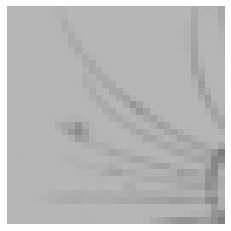

In [64]:
images, labels = next(iter(trainloader))
imshow(images[10,:]);

In [65]:
images.shape

torch.Size([32, 3, 32, 32])

In [79]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv2_drop = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(64*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 121)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

model = CNN() 
criterion = nn.NLLLoss()   
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [80]:
epochs = 10
print_every = 40

for e in range(epochs):
    running_loss = 0
    print(f"Epoch: {e+1}/{epochs}")

    for i, (images, labels) in enumerate(iter(trainloader)):

        
        
        optimizer.zero_grad()
        
        output = model.forward(images)   
        loss = criterion(output, labels) 
        loss.backward()                 
        optimizer.step()                        
        running_loss += loss.item()
        
        if i % print_every == 0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss = 0

Epoch: 1/10
	Iteration: 0	 Loss: 0.1197
	Iteration: 40	 Loss: 4.3563
	Iteration: 80	 Loss: 4.0605
	Iteration: 120	 Loss: 4.1122
	Iteration: 160	 Loss: 3.8802
	Iteration: 200	 Loss: 3.8593
	Iteration: 240	 Loss: 3.8687
	Iteration: 280	 Loss: 3.8321
	Iteration: 320	 Loss: 3.7839
	Iteration: 360	 Loss: 3.7473
	Iteration: 400	 Loss: 3.6796
	Iteration: 440	 Loss: 3.7150
	Iteration: 480	 Loss: 3.6368
	Iteration: 520	 Loss: 3.5819
	Iteration: 560	 Loss: 3.5774
	Iteration: 600	 Loss: 3.5366
	Iteration: 640	 Loss: 3.5145
	Iteration: 680	 Loss: 3.5073
	Iteration: 720	 Loss: 3.4610
	Iteration: 760	 Loss: 3.4512
	Iteration: 800	 Loss: 3.4325
	Iteration: 840	 Loss: 3.4269
	Iteration: 880	 Loss: 3.3882
	Iteration: 920	 Loss: 3.2890
Epoch: 2/10
	Iteration: 0	 Loss: 0.0859
	Iteration: 40	 Loss: 3.2905
	Iteration: 80	 Loss: 3.3083
	Iteration: 120	 Loss: 3.2808
	Iteration: 160	 Loss: 3.1657
	Iteration: 200	 Loss: 3.2272
	Iteration: 240	 Loss: 3.1565
	Iteration: 280	 Loss: 3.2093
	Iteration: 320	 Loss: 3